# learnable parameter

In [38]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt   
import numpy as np

https://discuss.pytorch.org/t/best-way-to-define-a-scalar-using-nn-parameter-in-pytorch/97209   
https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html

In [39]:
class module_scalar(nn.Module):
    def __init__(self):
        super().__init__()
        self.alpha = nn.Parameter(torch.ones(1))
    def forward(self,x):
        return x*self.alpha
    
    def value(self) :
        return self.alpha.data
    

0 : 27.48  | tensor([1.1000])
10 : 21.73  | tensor([2.0948])
20 : 16.76  | tensor([3.0653])
30 : 12.61  | tensor([3.9921])
40 : 9.258  | tensor([4.8597])
50 : 6.623  | tensor([5.6577])
60 : 4.616  | tensor([6.3799])
70 : 3.13  | tensor([7.0230])
80 : 2.063  | tensor([7.5869])
90 : 1.319  | tensor([8.0731])


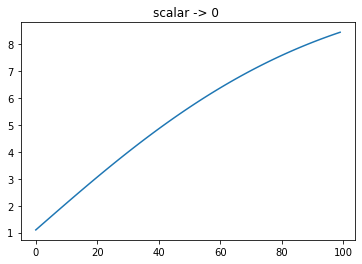

In [73]:

x = torch.rand(30,40)
#t = torch.zeros(30,40)
t = 10*x

m = module_scalar()
criterion = nn.MSELoss()

optimizer = torch.optim.Adam(m.parameters(),lr=0.1)

m.train()

n_iter = 100

val = np.zeros(n_iter)
for i in range(n_iter) : 
    y = m(x)
    loss = criterion(y,t)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    val[i]=(m.value().numpy())
    #print(val[-1])
    if i % 10 == 0 :
        print("{} : {:.4}  | {}".format(i,loss,m.value()))
        
plt.figure()
plt.title("scalar -> 0 ")
plt.plot(val[:])